In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
RANDOM_SEED = 0x0

# TASK 1: Polynomial Regression (4 Points): 

Let's create and explore the data.

In [3]:
# set the random seed to an integer, so that everyone has the same data to work with
np.random.seed(seed=RANDOM_SEED)
# create predictor variable, that have standard normal distribution and reshape it in order to use for the model training
x = np.random.normal(0, 1, 100).reshape(-1, 1)
# create target variable
y = 3*x**3 + 2*x**2 + x + np.random.normal(0, 10, 100).reshape(-1, 1)

Visualise the data

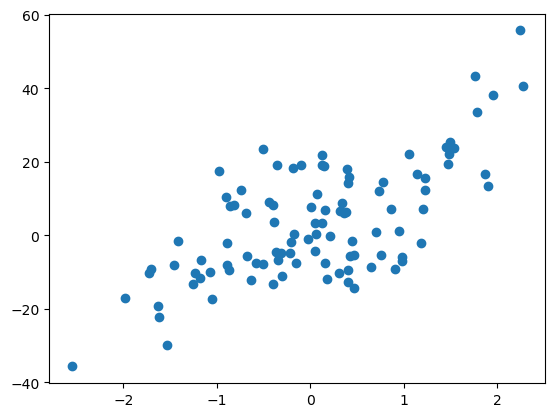

In [4]:
plt.scatter(x, y)
plt.show()

## Task 1a
Apply Linear Regression on the data


1. Split the data in the train and test set (80/20), set `random_state` to `RANDOM_SEED`.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=RANDOM_SEED)

2. Apply Linear Regression on the data and predict `y` values for training as well test data 

In [6]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
fit = lr.fit(X_train, y_train)
predict_train = lr.predict(X_train)
predict_test = lr.predict(X_test)

3. Calculate MSE for training as well as for test data.

In [7]:
def mse(y_pred, y_true):
  mse_val = 0
  for i in range(0, len(y_true)):
    mse_val += (y_pred[i]-y_true[i])**2
  return mse_val/len(y_true)

In [8]:
from sklearn.metrics import mean_squared_error

mse_train = mse(predict_train, y_train)
mse_test = mse(predict_test, y_test)

print(f"MSE of training data: {mse_train}")
print(f"MSE of training data: {mse_test}")

MSE of training data: [131.33541427]
MSE of training data: [135.7838186]


4. Visualize the model. Plot all the data as well as Linear Regression predictions for training and test data.

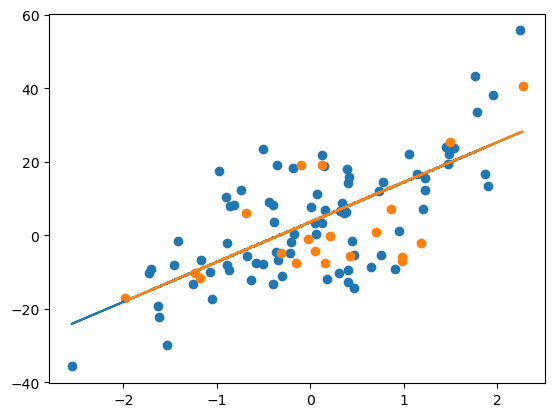

In [9]:
plt.scatter(X_train, y_train) #Trainingsdaten
plt.scatter(X_test, y_test) #Testdaten

plt.plot(X_train, predict_train) #Trainingsdaten
plt.plot(X_test, predict_test) #Testdaten

## Task 1b
Investigate how well polynomial regression with polynomial degrees = 2 can solve the task. In order to do so, follow these steps:
1. Transform the data accordingly to describe polynomial distribution of degree=2
2. Train a Linear Regression model on polynomial data
3. Make predictions for training data
4. Make predictions for test data
5. Calculate MSE for training as well as test data

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly_transformed_train = poly.fit_transform(X_train, y_train)
poly_transformed_test = poly.fit_transform(X_test, y_test)
lr = LinearRegression()
fit = lr.fit(poly_transformed_train, y_train)

predict_train = lr.predict(poly_transformed_train)
predict_test = lr.predict(poly_transformed_test)

mse_train_poly = mse(predict_train, y_train)
mse_test_poly = mse(predict_test, y_test)


print(f"MSE of training data: {mse_train_poly}")
print(f"MSE of training data: {mse_test_poly}")

MSE of training data: [129.64199704]
MSE of training data: [128.69895331]


6. Did it perform better than Linear Regression? Visualize the results.

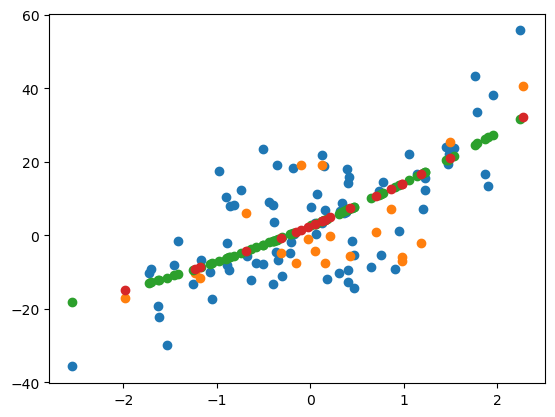

In [11]:
plt.scatter(X_train, y_train) #Trainingsdaten
plt.scatter(X_test, y_test) #Testdaten

plt.scatter(X_train, predict_train) #Trainingsdaten
plt.scatter(X_test, predict_test) #Testdaten

## Task 1c
Investigate the influence of polynomial degrees on the results. Consider degrees in range(0, 11). Plot MSE (on training as well as test data) depending on the number of the polynomial degrees. 

MSE of training data with degree 0: [252.55906491]
MSE of test data with degree 0: [199.3464641]
MSE of training data with degree 1: [131.33541427]
MSE of test data with degree 1: [135.7838186]
MSE of training data with degree 2: [129.64199704]
MSE of test data with degree 2: [128.69895331]
MSE of training data with degree 3: [107.95218527]
MSE of test data with degree 3: [96.96794313]
MSE of training data with degree 4: [105.67902404]
MSE of test data with degree 4: [99.05556113]
MSE of training data with degree 5: [104.44086502]
MSE of test data with degree 5: [91.46352859]
MSE of training data with degree 6: [104.43485365]
MSE of test data with degree 6: [92.61877395]
MSE of training data with degree 7: [102.12974684]
MSE of test data with degree 7: [98.94463377]
MSE of training data with degree 8: [100.93920533]
MSE of test data with degree 8: [109.66001112]
MSE of training data with degree 9: [97.08026571]
MSE of test data with degree 9: [161.3864374]
MSE of training data with deg

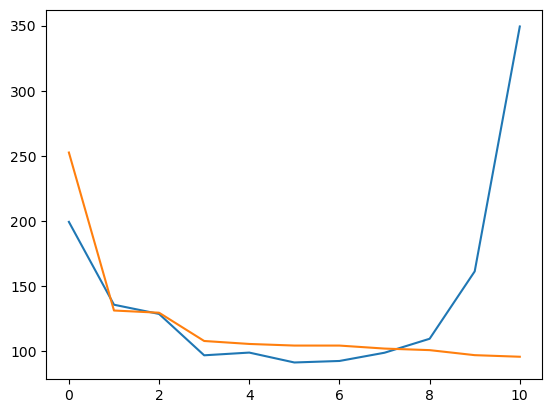

In [12]:
mse_train = []
mse_test = []
for i in range(0,11):
    poly = PolynomialFeatures(i)
    poly_transformed_train = poly.fit_transform(X_train, y_train)
    poly_transformed_test = poly.fit_transform(X_test, y_test)
    lr = LinearRegression()
    fit = lr.fit(poly_transformed_train, y_train)

    predict_train = lr.predict(poly_transformed_train)
    predict_test = lr.predict(poly_transformed_test)

    mse_train_poly = mse(predict_train, y_train)
    mse_test_poly = mse(predict_test, y_test)

    mse_train.append(mse_train_poly)
    mse_test.append(mse_test_poly)
    print(f"MSE of training data with degree {i}: {mse_train_poly}")
    print(f"MSE of test data with degree {i}: {mse_test_poly}")
plt.plot(range(0,11), mse_test)
plt.plot(range(0,11), mse_train)

## 📢 **HAND-IN** 📢: Answer following questions in Moodle:

What is the optimal value of the polynomial degrees? Do the values of MSE training and MSE test behave similarly? What event takes place in the models with polynomial degrees >= 8? 
**The optimal Value is 5. in the training dataset the MSE is getting continously better whilst in the test dataset it's getting worse and worse**

# Task 2: Polynomial Data Transformation (1 Point)

As we have seen in the lecture, Polynomial Regression is nothing other than a generalization of Linear Regression. Every polynomial Regression can be expressed as a Multivariate Linear Regression. Only transformation of the initial data has to be done.

 $h_\theta(a) = \theta_0 + \theta_1a_1 +\theta_2a_2 $, where
 $ a_0 = v^0, a_1 = v^1, a_2 = v^2 $

In Task 1 `sklearn.preprocessing.PolynomialFeatures` transformed the X data for us. But in order to understand what exactly it is done to the data, in this task we transform an initial data array $v$ to 
the form $(a_1...a_n)$ that can be used to build a Polynomial Regression model with polynomial degrees=2 by hand (without using `sklearn.preprocessing.PolynomialFeatures`). Please transform the array $v$ and insert your answer in Moodle.

In [13]:
v = np.array([[3],[2],[0]])
v_transformed = []
for i in range(0, np.transpose(v).size):
    v_transformed.append(np.transpose(v) ** i)
print(np.transpose(v_transformed))

[[[1 3 9]]

 [[1 2 4]]

 [[1 0 0]]]


\begin{align}
v=
\begin{bmatrix}
3 \\
2 \\
0 \\
\end{bmatrix}
\end{align}

## 📢 **HAND-IN** 📢: Write your answer in Moodle

# Task 3: Logistic Regression (6 Points)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns
sns.set()

## Task 3a. Data Exploration and Preprocessing

We are using the Fashion MNIST Dataset from Zalando. 
Firstly, we load and explore the dataset.



In [20]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

(60000, 28, 28)
(60000,)
uint8
uint8


In [21]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In following task we will only use training part of the dataset.

#### Prepare data 
1. assign following datatypes to the arrays:
   - X_train -> 'float32'
   - y_train -> 'int64'
2. reshape X_train to 2-dimensional array. 
Note: 
   - it should have the same amount of samples/rows.
   - the pictures are in greyscale, it means they have only one value of color per pixel.
3. split the training data into (X_train, y_train) and (X_valid, y_valid), set the size of the validation dataset to 20% of the data and set random state = 42.

In [23]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int64)

print(X_train.shape)

X_train_reshaped = X_train.reshape(-1,28*28)
print(X_train_reshaped.shape)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_reshaped, y_train, test_size = 0.2, random_state = 42)

print(X_train.shape)

(48000, 784)
(48000, 784)
(38400, 784)


#### Visualize some data 
Plot 25 images (hint: use ``imshow`` and ``subplots`` from matplotlib library), plot the label as title (e.g. shorts).

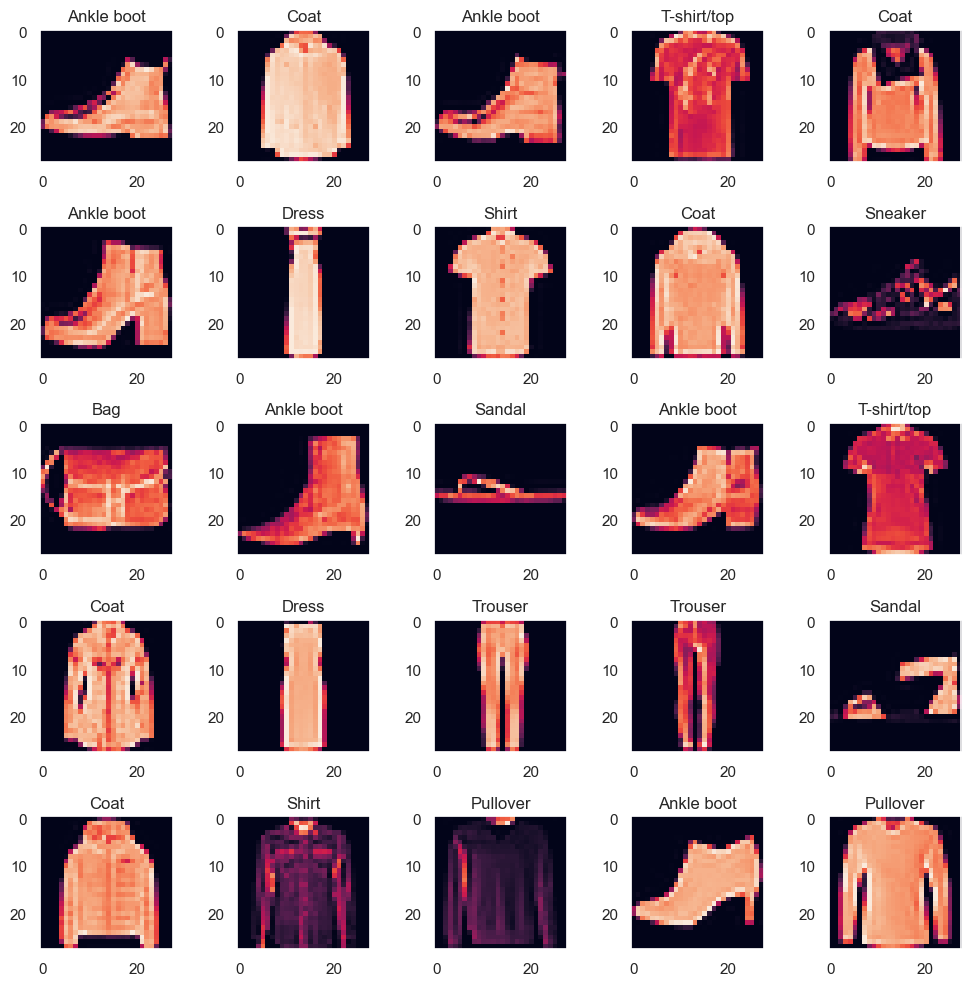

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.tight_layout(pad=1.0)
    plt.imshow(X_train[i].reshape(28,28))
    plt.title(label_names[y_train[i]])
plt.show()

#### Normalize the Images
With mean and standard deviation

In [26]:
mean, std = X_train.mean(), X_train.std()
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

## Task 3b. Logistic Regression
1. Fit the `LogisticRegression` from `scikit-learn`
2. Try different parameters (either by hand or by using `GridSearchCV`)


**Accuracy should be >= 0.84**

If you use GridSearchCV, you could use the skeleton of the code in the next cell, otherwise, skip it. 

Please, check the documentation on:
GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

PredefinedSplit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html?highlight=predefinedsplit#sklearn.model_selection.PredefinedSplit

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import LogisticRegression
# We use predefined split in order to control that no train samples would be used in validation step


train_indices = np.full((X_train.shape[0],), -1, dtype=int)
test_indices = np.full((X_valid.shape[0],), 0, dtype=int)

ps = PredefinedSplit(np.append(train_indices, test_indices))

parameters = {'C': [0.01,0.1,2.,3.,4.,6.,10], 'solver': ['lbfgs', 'sag','saga']}

# clf = LogisticRegression(max_iter=200)

clf = GridSearchCV(LogisticRegression(max_iter=10), param_grid=parameters, cv=ps) 

# when we fit the model, we should use both training and validation samples
# clf.fit(X_train,y_train)
clf.fit(np.append(X_train, X_valid, axis=0), np.append(y_train, y_valid, axis=0))

y_pred = clf.predict(X_valid)

print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

C:\Users\axgno01\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\axgno01\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\axgno01\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\axgno01\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to conv

KeyboardInterrupt: 

Use the best found parameters for the next steps.

3. Calculate the Accuracy, Precision, Recall, and F-Score on the validation set (The metrics can be found in `scikit-learn` library)
4. Print the confusion Matrix (hint: you can use function `heatmap()` of `seaborn` library)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from seaborn import heatmap

acc = accuracy_score(y_valid,y_pred)
pre = precision_score(y_valid,y_pred,average='micro')
rec = recall_score(y_valid,y_pred,average='micro')
f1 = f1_score(y_valid,y_pred,average='micro')

print(f'accuracy_score: {acc}')
print(f'precision_score: {pre}')
print(f'recall_score: {rec}')
print(f'f1_score: {f1}')

cf_matrix = confusion_matrix(y_valid, y_pred)

heatmap(cf_matrix,annot=True,linewidths=.5,fmt="g", annot_kws={"size": 10})
plt.show()

NameError: name 'y_pred' is not defined

## 📢 **HAND-IN** 📢: Report in Moodle F-Score and the confusion matrix you got in this task.